# Hotel Booking Cancel Prediction


This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

    hotel: Resort Hotel or City Hotel
    is_canceled: Value indicating if the booking was canceled (1) or not (0)
    lead_time: Number of days between the booking date to the arrival date
    arrival_date_year: Year of arrival
    arrival_date_month: Month of arrival
    arrival_date_week_number: Week number according to year of arrival
    arrival_date_day_of_month: Day of arrival
    stays_in_weekend_nights: Number of weekend nights booked (Saturday or Sunday)
    stays_in_week_nights: Number of week nights booked (Monday to Friday)
    adults: Number of adults
    children: Number of children
    babies: Number of babies
    meal: Type of meal booked
    country: Country of origin
    market_segment: Market segment designation, typically influences the price sensitivity
    distribution_channel: Booking distribution channel, refers to how the booking was made
    is_repeated_guest: Value indication if the booking was from a repeated guest (1) or not (0)
    previous_cancellations: Number of previous cancellations prior to current booking
    previous_bookings_not_canceled: Number of previous booking not canceled prior to current booking
    reserved_room_type: Code of room type reserved
    assigned_room_type: Code for the type of room assigned to the booking
    booking_changes: Number of changes made to the booking since entering the hotel management system
    deposit_type: Type of deposit made for the reservation
    agent: ID of the travel agency that made the booking
    company: ID of the company/organization that made the booking or is responsible for payment
    days_in_waiting_list: Number of days booking was in the waiting list until it was confirmed
    customer_type: Type of booking
    adr: Average Daily Rate (the sum of transactions divided by the number of nights stayed)
    required_car_parking_spaces: Number of car parking spaces requested
    total_of_special_requests: Number of special requests made by the customer
    reservation_status: Last reservation status (Canceled, Check-Out, No-Show)
    reservation_status_date: Date at which the last status was set

Get the dataset from : https://www.kaggle.com/jessemostipak/hotel-booking-demand

About the dataset : https://www.sciencedirect.com/science/article/pii/S2352340918315191

# Reading & Understanding the dataset 

In [1]:
# importing essential libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',50)

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data Visualization 

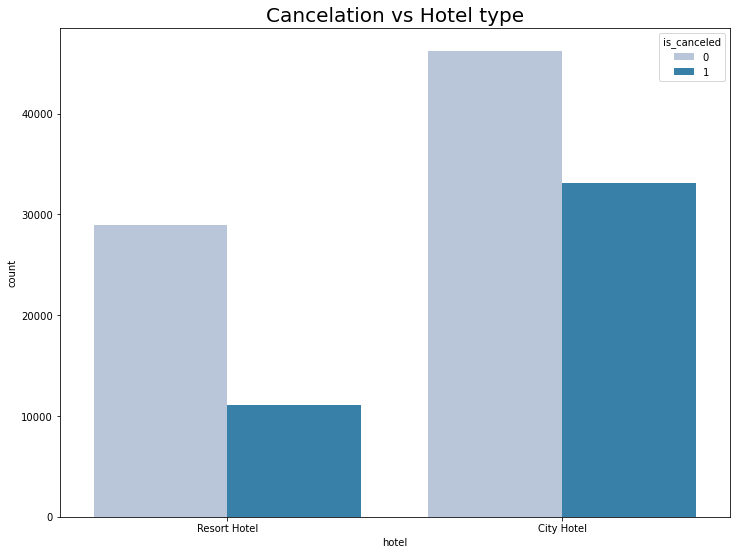

In [5]:
plt.figure(figsize = (12,9))
sns.countplot(df['hotel']  ,hue=df['is_canceled'] ,palette='PuBu')
plt.title('Cancelation vs Hotel type' , size = 20)
plt.show()

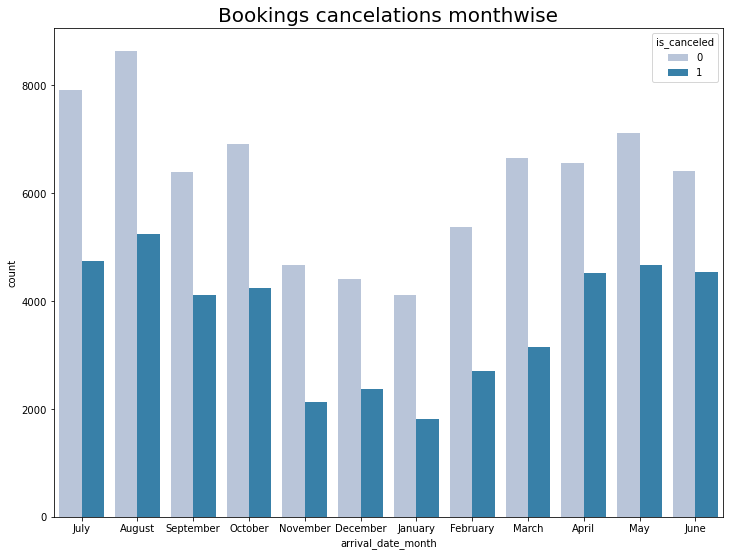

In [6]:
plt.figure(figsize = (12,9))
sns.countplot( df['arrival_date_month'] ,hue = df['is_canceled']  ,palette='PuBu')
plt.title('Bookings cancelations monthwise' , size = 20)
plt.show()

We can observe that August month sees the highest no of booking cancellations followed by July ,May ,April & ...


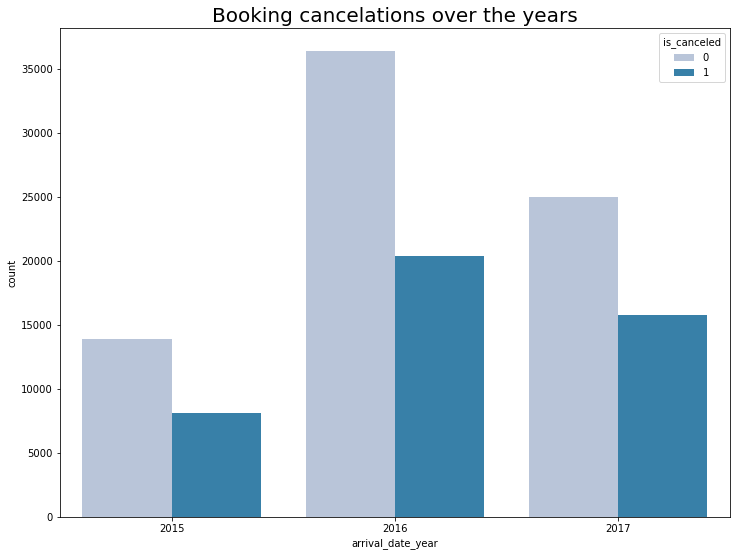

In [7]:
plt.figure(figsize = (12,9))
sns.countplot( df['arrival_date_year'] ,hue = df['is_canceled']  ,palette='PuBu')
plt.title('Booking cancelations over the years' , size = 20)
plt.show()

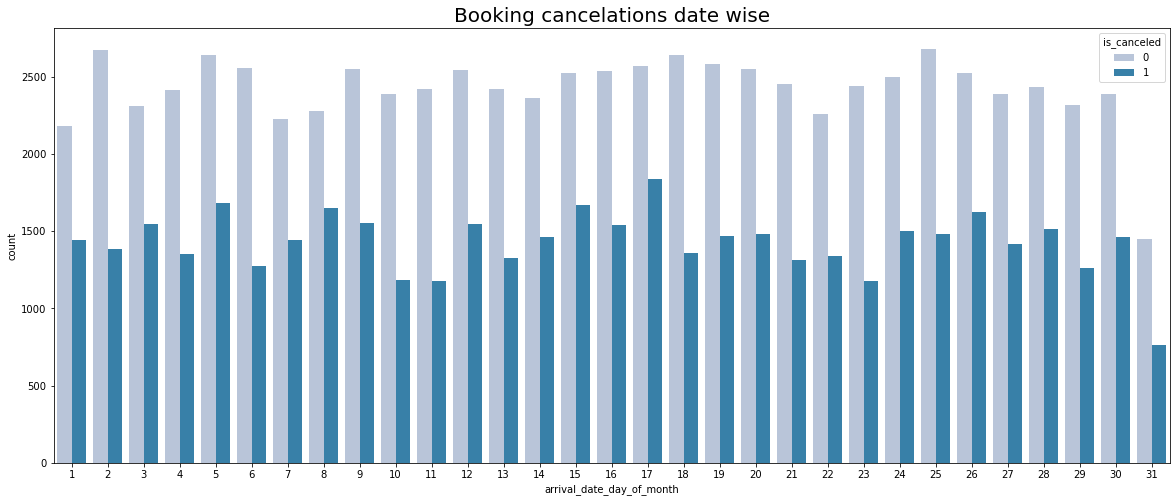

In [8]:
plt.figure(figsize = (20,8))
sns.countplot( df['arrival_date_day_of_month'] ,hue = df['is_canceled']  ,palette='PuBu')
plt.title('Booking cancelations date wise' , size = 20)
plt.show()

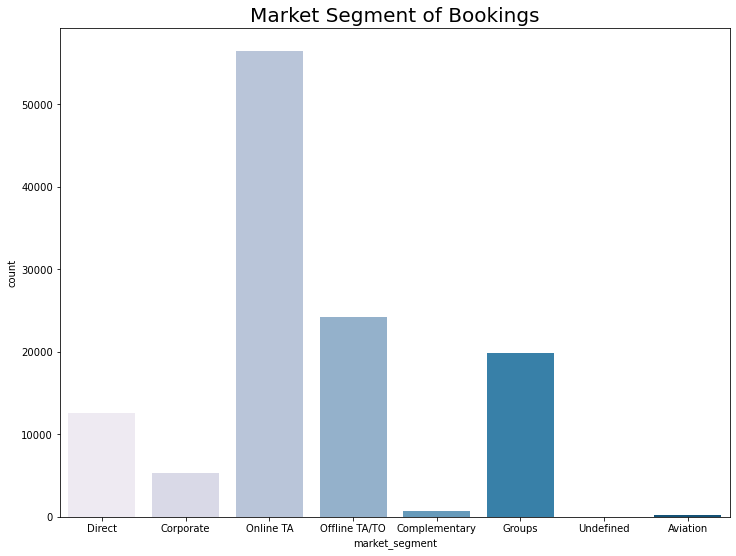

In [9]:
plt.figure(figsize = (12,9))
sns.countplot( df['market_segment']   ,palette='PuBu')
plt.title('Market Segment of Bookings' , size = 20)
plt.show()

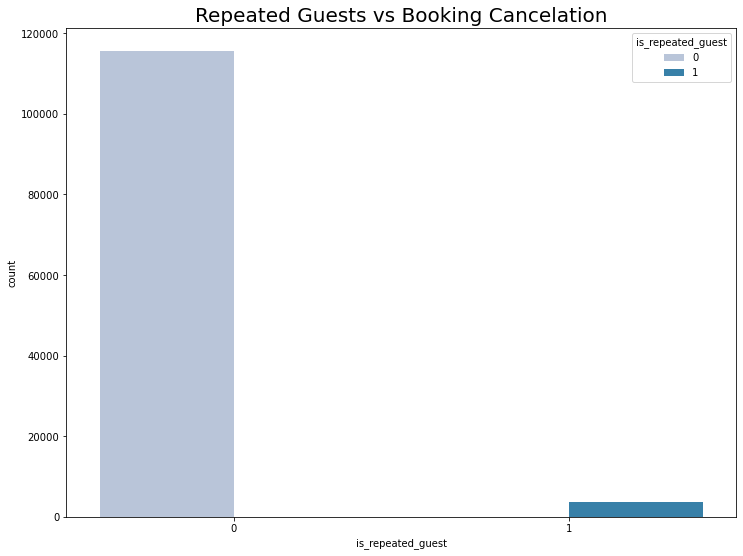

In [10]:
plt.figure(figsize = (12,9))
sns.countplot( df['is_repeated_guest']  ,hue = df['is_repeated_guest'],palette='PuBu')
plt.title('Repeated Guests vs Booking Cancelation' , size = 20)
plt.show()

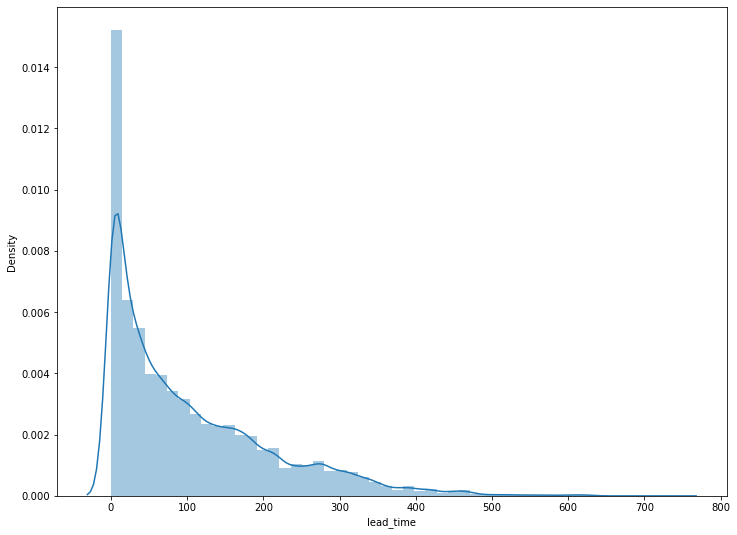

In [11]:
plt.figure(figsize = (12,9))
sns.distplot(df['lead_time']  )
plt.show()

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


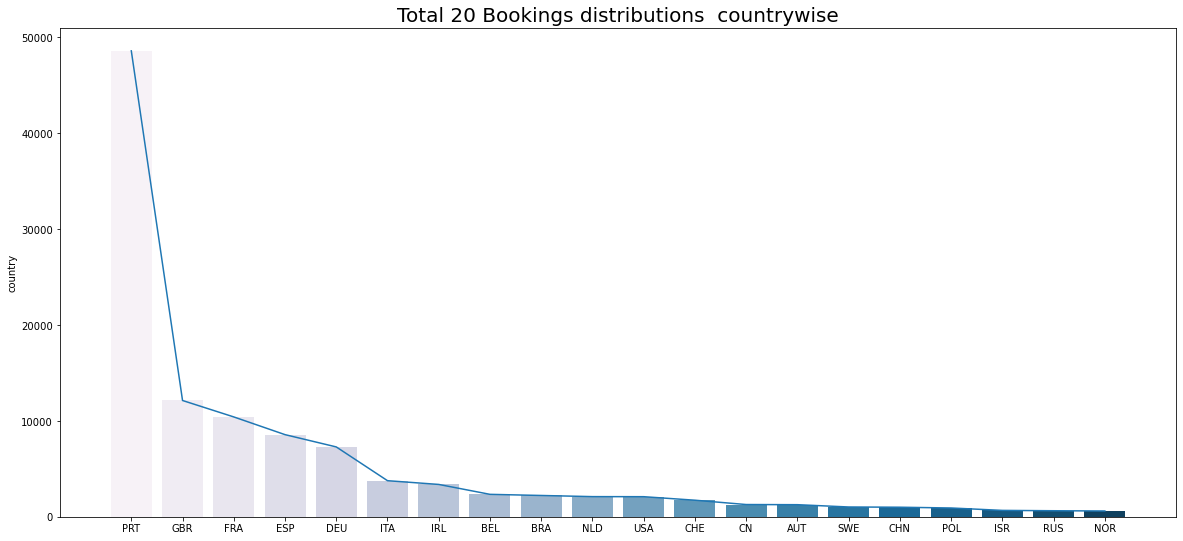

In [13]:
plt.figure(figsize = (20,9))
sns.barplot( df['country'].value_counts()[:20].index,df['country'].value_counts()[:20],palette='PuBu')
sns.lineplot( df['country'].value_counts()[:20].index,df['country'].value_counts()[:20])
plt.title('Total 20 Bookings distributions  countrywise',size = 20)
plt.show()

# Data Wrangling

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
df.shape

(119390, 32)

In [16]:
# Checking Null Values

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
# Dropping column Company
df.drop('company',1,inplace= True)

<AxesSubplot:xlabel='agent', ylabel='Density'>

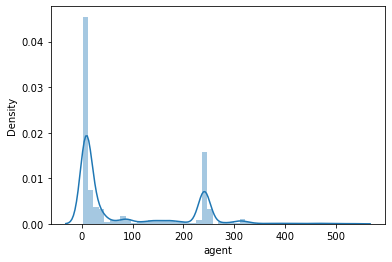

In [18]:
sns.distplot(df['agent'] )

In [19]:
# Imputing all the missing values

df['agent'].fillna(df['agent'].median() ,inplace=True )
df['country'].fillna('PRT',inplace=True)
df['children'].fillna(df['children'].mean(),inplace=True)

In [20]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [21]:
# creating a list of columns containing various categories
cols = ['hotel','arrival_date_month','meal','country','market_segment','distribution_channel',
        'reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']

In [22]:
# Checking value counts of each columns

for x in df[cols].columns:
    print(df[x].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BFA        1
BDI        1
SDN        1
NAM        1
SLE        1
Name: country, Length: 177, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64
A   

In [23]:
# Performing label Encoding on various columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[cols] = df[cols].apply(le.fit_transform)
df.head()   

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,14.0,0,2,0.0,0,0,1,2015-07-01
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,14.0,0,2,0.0,0,0,1,2015-07-01
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,14.0,0,2,75.0,0,0,1,2015-07-02
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,2015-07-02
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,2015-07-03


In [24]:
# Creating new columns 
df['total_guests'] = df['adults']+df['children']+df['babies']

df.drop(['adults','children','babies'],1,inplace =True)

In [25]:
#Dropping reservation_status_date
df.drop('reservation_status_date',1,inplace=True)

In [26]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
0,1,0,342,2015,5,27,1,0,0,0,135,3,1,0,0,0,2,2,3,0,14.0,0,2,0.0,0,0,1,2.0
1,1,0,737,2015,5,27,1,0,0,0,135,3,1,0,0,0,2,2,4,0,14.0,0,2,0.0,0,0,1,2.0
2,1,0,7,2015,5,27,1,0,1,0,59,3,1,0,0,0,0,2,0,0,14.0,0,2,75.0,0,0,1,1.0
3,1,0,13,2015,5,27,1,0,1,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,1.0
4,1,0,14,2015,5,27,1,0,2,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,2.0


# Model Building 

In [27]:
# Creating X & y
X = df.drop('is_canceled',1)
y = df['is_canceled']

In [28]:
# Creating train test datasets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7 ,random_state= 200)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((83573, 27), (35817, 27), (83573,), (35817,))

Creating a no of ml models to find out the models among them

In [29]:
from sklearn.metrics import f1_score ,classification_report

In [30]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train) ,lr.score(X_test,y_test)

(0.8109915881923587, 0.8111511293519837)

In [31]:
# Evaluating the model
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test ,y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     22672
           1       0.77      0.70      0.73     13145

    accuracy                           0.81     35817
   macro avg       0.80      0.79      0.79     35817
weighted avg       0.81      0.81      0.81     35817



We are getting accuracy of 81% in Logistic Regression

In [32]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_train,y_train) ,rf.score(X_test,y_test)

(1.0, 1.0)

In [33]:
# Evaluating the RandomForest model
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test ,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22672
           1       1.00      1.00      1.00     13145

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



So we are getting 100% Accuracy in RandomForestClassifier

In [34]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train) ,dt.score(X_test,y_test)


(1.0, 1.0)

In [35]:
# Evaluating the DecisionTree model
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test ,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22672
           1       1.00      1.00      1.00     13145

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



So we are getting 100% Accuracy in DecisionTree

In [36]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train) ,gbc.score(X_test,y_test)

(1.0, 1.0)

In [37]:
# Evaluating the GradientBoosting model
y_pred_gbc = gbc.predict(X_test)

print(classification_report(y_test ,y_pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22672
           1       1.00      1.00      1.00     13145

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



So we are getting 100% Accuracy in GradientBoosting

In [38]:
# Getting the top 10 features

top_features = pd.Series(rf.feature_importances_,X_train.columns)
top_features = top_features.nlargest(10)
top_features

reservation_status             0.751887
deposit_type                   0.073107
country                        0.033695
lead_time                      0.025559
previous_cancellations         0.018781
total_of_special_requests      0.017528
market_segment                 0.014599
agent                          0.010700
required_car_parking_spaces    0.009718
customer_type                  0.006761
dtype: float64

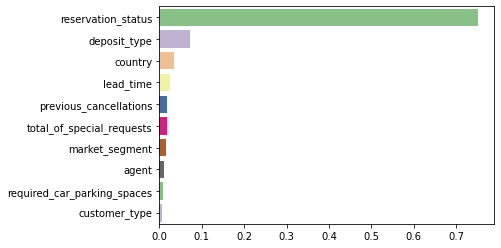

In [39]:
# Final Top 10 features are
sns.barplot(top_features.values , top_features.index  , palette='Accent')
plt.show()